In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## Import data

In [2]:
train = pd.read_excel(r"C:\Users\MANHLK\Downloads\Telegram Desktop\5k_result_model_thesis.xlsx")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label_true  4930 non-null   int64 
 1   Sentence    4930 non-null   object
dtypes: int64(1), object(1)
memory usage: 77.2+ KB


In [4]:
train.head()

,Label_true,Sentence
0,-1,vietjet da em sợ anh_chị vietjet lắm ròii ạ
1,-1,ngoài lý_do lỗi kỹ_thuật máy_bay thời_tiết xấu...
2,-1,nhiều hành_khách bức_xúc vì không_thể bay đúng...
3,0,el_dorado ii sở_hữu nhiều ưu_thế như vị_trí đắ...
4,-1,khi nhắc đến chị thảo vietjet nhiều người nhớ ...


## Count kind of sentiment

In [5]:
sentiment_word = []
for i in train['Label_true']:
    if i == -1: 
        sentiment_word.append('negative')
    elif i == 0:
        sentiment_word.append('neutral')
    elif i == 1:
        sentiment_word.append('positive')
    else:
        pass
train['Sentiment_word']=sentiment_word

In [6]:
count_sentiment = pd.value_counts(train['Sentiment_word'], sort=False)
count_sentiment

neutral     2346
negative    1515
positive    1069
Name: Sentiment_word, dtype: int64

## Visualize

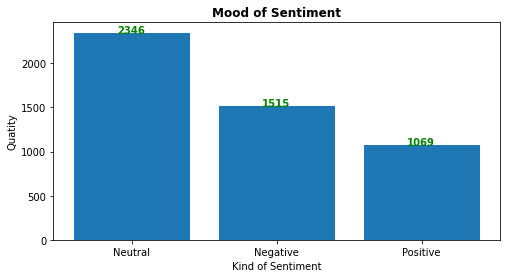

In [7]:
index = [1,2,3]
plt.figure(figsize=(8,4))
plt.bar(index, count_sentiment)
plt.xticks(index, ['Neutral', 'Negative', 'Positive'], rotation=0)
plt.xlabel('Kind of Sentiment')
plt.ylabel('Quatity')
plt.title("Mood of Sentiment", fontweight='bold')
for x, y in zip(index, count_sentiment):
    plt.text(x-0.1,y,str(y),color='green',fontweight='bold')
plt.show()

## Pre-data processing

### Remove emoji

In [8]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

### Clearn sentence column in data set

In [9]:
def review_to_word(raw_review):
    stopwords = pd.read_csv('D:\Documents\Đồ án 2\Sentiment Analysis\stopwords\stopword.txt',sep='\t')
    review = raw_review
    review = remove_emoji(review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in stopwords.values]
    return (' '.join(review))

In [10]:
new_sentence = []
for i in range(train.shape[0]):
    new_sentence.append(review_to_word(train['Sentence'][i]))
train['New_sentence']=new_sentence

In [11]:
train.head()

,Label_true,Sentence,Sentiment_word,New_sentence
0,-1,vietjet da em sợ anh_chị vietjet lắm ròii ạ,negative,vietjet da sợ anh_chị vietjet lắm ròii
1,-1,ngoài lý_do lỗi kỹ_thuật máy_bay thời_tiết xấu...,negative,lỗi kỹ_thuật máy_bay thời_tiết xấu nguyên_nhân...
2,-1,nhiều hành_khách bức_xúc vì không_thể bay đúng...,negative,hành_khách bức_xúc bay lịch_trình vé
3,0,el_dorado ii sở_hữu nhiều ưu_thế như vị_trí đắ...,neutral,el_dorado ii sở_hữu ưu_thế đắc_địa kết_nối thu...
4,-1,khi nhắc đến chị thảo vietjet nhiều người nhớ ...,negative,nhắc thảo vietjet chuyến bay delay sự_cố máy_b...


## Select positive sentence

In [12]:
positive_data = train[train['Sentiment_word']=='positive']

In [13]:
positive_data.head()

,Label_true,Sentence,Sentiment_word,New_sentence
8,1,vietnam_airlines – chào hè rực_rỡ mang đến cho...,positive,vietnam_airlines – chào hè rực_rỡ tham_quan tr...
9,1,lấy ví_dụ top hãng hàng không đứng đầu thái_la...,positive,ví_dụ top hãng hàng không đứng đầu thái_lan gi...
18,1,đây_spa_ruột của mình khi đến cần_thơ gần bến_...,positive,đây_spa_ruột cần_thơ bến_ninh_kiều đi_lại dễ_d...
27,1,chơi ở đây khá thoải_mái trời dạo này đang nón...,positive,thoải_mái trời dạo nóng giải_trí ly cafe không...
33,1,thịt gà ko ngon nhưng trà sữa thì tuyệt_vời lạ...,positive,thịt gà ko ngon trà sữa tuyệt_vời rẻ k_cốc


In [14]:
positive_split = ' '.join(' '.join(positive_data['New_sentence']).split())

## Visualize

In [15]:
from wordcloud import WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

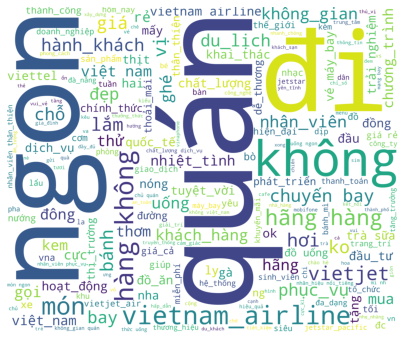

In [16]:
positive_wordcloud = WordCloud(background_color='white',
                              width = 3000,
                              height= 2500).generate(positive_split)
plt.figure(figsize=(13,6))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=2500)
positive_vectorizer = vectorizer.fit_transform(positive_data.loc[:,'New_sentence']).toarray()
positive_word = vectorizer.get_feature_names()

In [18]:
positive_vectorizer.shape

(1069, 2500)

In [19]:
dist = np.sum(positive_vectorizer,axis=0)

In [20]:
positive_df = pd.DataFrame(positive_word,columns=['Positive_word'])

In [21]:
positive_df['Frequency']=dist

In [22]:
positive_df.sort_values(['Frequency'],ascending=False).head(30)

,Positive_word,Frequency
883,không,356
1476,quán,335
1212,ngon,293
2319,đi,188
711,hàng,178
2129,vietnam_airlines,175
1125,món,171
725,hãng,168
54,bay,155
586,giá,128


### Select negative sentence

In [23]:
negative_data = train[train['Sentiment_word']=='negative']
negative_data.head()

,Label_true,Sentence,Sentiment_word,New_sentence
0,-1,vietjet da em sợ anh_chị vietjet lắm ròii ạ,negative,vietjet da sợ anh_chị vietjet lắm ròii
1,-1,ngoài lý_do lỗi kỹ_thuật máy_bay thời_tiết xấu...,negative,lỗi kỹ_thuật máy_bay thời_tiết xấu nguyên_nhân...
2,-1,nhiều hành_khách bức_xúc vì không_thể bay đúng...,negative,hành_khách bức_xúc bay lịch_trình vé
4,-1,khi nhắc đến chị thảo vietjet nhiều người nhớ ...,negative,nhắc thảo vietjet chuyến bay delay sự_cố máy_b...
6,-1,định không nói về vụ vj đưa bẩn bựa vào trong ...,negative,định không vụ vj bẩn bựa chuyến bay đón u việt...


### Visualize

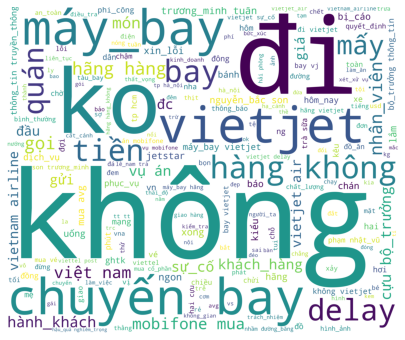

In [24]:
negative_split = ' '.join(' '.join(negative_data['New_sentence']).split())
negative_wordcloud = WordCloud(background_color='white',
                              width = 3000,
                              height = 2500).generate(negative_split)
plt.figure(figsize=(13,6))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

### Select neutral sentence

In [25]:
neutral_data = train[train['Sentiment_word']=='neutral']
neutral_data.head()

,Label_true,Sentence,Sentiment_word,New_sentence
3,0,el_dorado ii sở_hữu nhiều ưu_thế như vị_trí đắ...,neutral,el_dorado ii sở_hữu ưu_thế đắc_địa kết_nối thu...
5,0,c_ck lại giúp em hức,neutral,c_ck giúp hức
7,0,hủy chuyến bay đến hồng_kông trung_quốc do ảnh...,neutral,hủy chuyến bay hồng_kông trung_quốc ảnh_hưởng ...
10,0,còn nhiều lắm nhưng không_thể kể xiết,neutral,lắm xiết
15,0,với nhiệm_vụ bảo_vệ đảng bảo_vệ chế_độ đội_ngũ...,neutral,nhiệm_vụ bảo_vệ đảng bảo_vệ chế_độ đội_ngũ côn...


In [26]:
neutral_split = ' '.join(' '.join(neutral_data['New_sentence']).split())

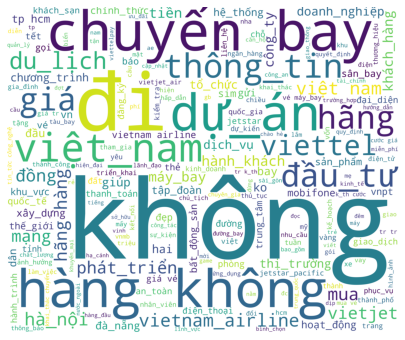

In [27]:
neutral_wordcloud = WordCloud(background_color='white',
                             width = 3000,
                             height = 2500).generate(neutral_split)
plt.figure(figsize=(13,6))
plt.imshow(neutral_wordcloud)
plt.axis('off')
plt.show()

### Model

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC 

In [29]:
def train_model(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x ,y, test_size=0.2, random_state= 0)
    clf_MNB = MultinomialNB(fit_prior=False)
    clf_SVM = SVC(kernel='linear')
    clf_MNB.fit(x_train, y_train)
    clf_SVM.fit(x_train, y_train)
    print("Multinomial Naive Bayes:")
    print("Train Accuracy:",round(clf_MNB.score(x_train, y_train)*100,2),"%")
    print("Test Accuracy:",round(clf_MNB.score(x_test, y_test)*100,2),"%")
    print("Support Vector Machine Kernel = Linear")
    print("Train Accuracy:", round(clf_SVM.score(x_train, y_train)*100,2),"%")
    print("Test Accuracy:", round(clf_SVM.score(x_test, y_test)*100,2),"%")

In [30]:
def svm_model(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x ,y, test_size=0.2, random_state= 0)
    params = {'kernel':['linear','poly','rbf','sigmoid']}
    clf = GridSearchCV(SVC(),params)
    clf.fit(x_train, y_train)
    print(clf.best_params_)

### Vectorizer 

#### Bag of words

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
vectorizer = CountVectorizer(max_features=2000)
X = vectorizer.fit_transform(train.loc[:,'New_sentence']).toarray()
y = train.iloc[:,0]
train_model(X,y)

Multinomial Naive Bayes:
Train Accuracy: 75.89 %
Test Accuracy: 65.52 %
Support Vector Machine Kernel = Linear
Train Accuracy: 94.52 %
Test Accuracy: 69.27 %


#### TF-IDF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X = tfidf_vectorizer.fit_transform(train.loc[:,'New_sentence']).toarray()
y = train.iloc[:,0]
train_model(X,y)

Multinomial Naive Bayes:
Train Accuracy: 78.22 %
Test Accuracy: 66.73 %
Support Vector Machine Kernel = Linear
Train Accuracy: 85.17 %
Test Accuracy: 73.23 %


### Chose TF-IDF vs SVM

In [35]:
svm_model(X,y)

{'kernel': 'linear'}


### Improve

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
params = {'C':[0.7, 0.8, 1], 'kernel':['linear']}
clf = GridSearchCV(SVC(),params)
clf.fit(X_train, y_train)
print(clf.best_params_)
print("Test Accuracy:", round(clf.best_estimator_.score(X_train,y_train)*100,2),'%')
print("Test Accuracy:",round(clf.best_estimator_.score(X_test,y_test)*100,2),'%')

{'C': 0.8, 'kernel': 'linear'}
Test Accuracy: 83.75 %
Test Accuracy: 72.21 %


In [37]:
from sklearn.metrics import classification_report, confusion_matrix 

In [38]:
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.80      0.68      0.73       303
           0       0.67      0.87      0.76       455
           1       0.78      0.48      0.60       228

    accuracy                           0.72       986
   macro avg       0.75      0.68      0.70       986
weighted avg       0.74      0.72      0.71       986



### Select false data prediction

In [39]:
false_predict = train[train['Label_true']!=clf.predict(X)]
false_predict

,Label_true,Sentence,Sentiment_word,New_sentence
9,1,lấy ví_dụ top hãng hàng không đứng đầu thái_la...,positive,ví_dụ top hãng hàng không đứng đầu thái_lan gi...
13,-1,bắc bộ rét đậm rét_hại,negative,bắc rét đậm rét_hại
20,-1,bé trai tuổi chờ chết vì,negative,bé trai chờ chết
30,-1,bị tổng_đài vietnammobile trừ phí gian_lận đã ...,negative,tổng_đài vietnammobile trừ phí gian_lận mong c...
31,-1,trao_đổi với zing vn ông nguyễn_tiến_sĩ nhân_v...,negative,trao_đổi zing vn nguyễn_tiến_sĩ nhân_viên truy...
...,...,...,...,...
4906,-1,mẹ mình thích uống ở đây lắm thường thì tuần m...,negative,mẹ uống lắm tuần mua trà sữa tình_viên uống du...
4910,0,thông_báo hiện_tại cả hãng hàng không nội_địa ...,neutral,thông_báo hãng hàng không nội_địa vietnam airl...
4915,1,trước_mắt hãng hàng không này sẽ thuê máy_bay ...,positive,trước_mắt hãng hàng không thuê máy_bay vận_hàn...
4926,1,sáng tại sân_bay quốc_tế nội bài vietnam_airli...,positive,sân_bay quốc_tế nội vietnam_airlines đón_nhận ...


### Add label predict false column

In [40]:
label_predict = clf.predict(X)

In [41]:
false_label_predict = [list(label_predict)[i] for i in range(train.shape[0]) if list(label_predict)[i] != train['Label_true'][i] ]

In [42]:
false_predict['Label_predict']=false_label_predict

c:\users\manhlk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Add length of new sentence predict false column

In [43]:
len_sentence = []
for i in range(false_predict.shape[0]):
    len_sentence.append(len(false_predict['New_sentence'][false_predict.index.values[i]].split()))
false_predict['Length_new_sentence'] = len_sentence

c:\users\manhlk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Export to excel

In [44]:
false_predict_data = pd.ExcelWriter('new_false_data.xlsx',engine='xlsxwriter')
false_predict.to_excel(false_predict_data,sheet_name='Sheet1')
false_predict_data.save()

### Count of kind false sentiment predict

In [45]:
count_false_sentiment = pd.value_counts(false_predict['Sentiment_word'])
count_false_sentiment

positive    423
negative    337
neutral     155
Name: Sentiment_word, dtype: int64

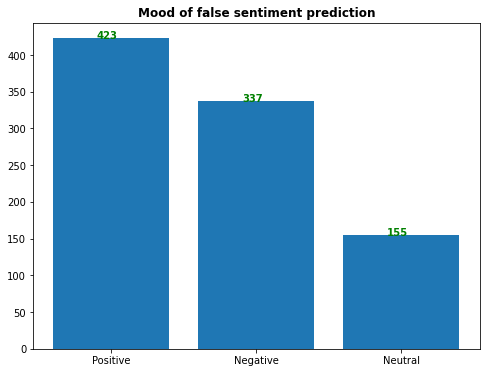

In [46]:
index = [1,2,3]
plt.figure(figsize=(8,6))
plt.bar(index, count_false_sentiment)
plt.xticks(index, ['Positive', 'Negative', 'Neutral'])
plt.title('Mood of false sentiment prediction', fontweight='bold')
for x,y in zip(index, count_false_sentiment):
    plt.text(x-0.1,y,str(y),color='green',fontweight='bold')
plt.show()

### Describle sentence

In [47]:
false_predict['Length_new_sentence'].describe()

count    915.000000
mean      15.196721
std       15.160144
min        0.000000
25%        6.000000
50%       12.000000
75%       20.000000
max      259.000000
Name: Length_new_sentence, dtype: float64

In [48]:
data_1 = false_predict[false_predict['Length_new_sentence']<6]

In [49]:
data_1

,Label_true,Sentence,Sentiment_word,New_sentence,Label_predict,Length_new_sentence
13,-1,bắc bộ rét đậm rét_hại,negative,bắc rét đậm rét_hại,0,4
20,-1,bé trai tuổi chờ chết vì,negative,bé trai chờ chết,0,4
52,-1,việt nam mình ngày_càng có những bộ phịm hấp_dẫn,negative,việt nam phịm hấp_dẫn,0,4
57,1,thị_phần nội_địa bình_quân đạt thị_phần quốc_t...,positive,thị_phần nội_địa bình_quân thị_phần quốc_tế,0,5
67,-1,tuy_nhiên do vấp phải nhiều phản_đối từ các ch...,negative,vấp phản_đối chuyên_gia kiến_nghị thông_qua,0,5
...,...,...,...,...,...,...
4810,-1,cuộc_sống là vậy cái gì cái cũng phải rõ_ràng ...,negative,cuộc_sống rõ_ràng gắn_bó lâu_dài vnmb,0,5
4813,0,hết luôn tiền rồi,neutral,tiền,-1,1
4857,1,du_lịch bằng thẻ tín_dụng cách tiêu_dùng thông...,positive,du_lịch thẻ tín_dụng tiêu_dùng thông_minh,0,5
4869,0,là khi hàng gấp và nhiều lại trễ chuyến tối,neutral,hàng gấp trễ chuyến tối,-1,5
